# 외국인 비율과 범죄비율의 상관관계 분석

### 서론

영화 '범죄 도시'에서는 외국인들의 강력범죄에 대한 이야기를 다루고있는데, 이 영화를 통해 실제로 외국인 비율과 강력범죄의 비율이 상관있는지에 대해 궁금해짐. 2016년 각 도시별 외국인수와 강력범죄수의 데이터를 이용해 분석하기로 결정함.

### 본론

#### 분석목표
- 인구수 대비 외국인 비율을 파악하여 5%가 넘는 시,군,구를 파악하여 범죄비율 파악

## 데이터 정리하기

- 필요한 모듈 실행

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [144]:
# 폰트 문제 해결하기# 폰트 문제  
import platform
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
rc('font', family=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name())
print (plt.rcParams['font.family'])

['Malgun Gothic']


In [145]:
print (plt.rcParams['font.family'])

['Malgun Gothic']


In [146]:
# 데이터 로드
crime_police = pd.read_csv('2016_crime1.csv', encoding='euc-kr', engine='python', thousands=',', header= 1)
crime_police.head()

,-,범죄중분류,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간 강제추행등,방화,...,특별경제범죄,마약범죄,보건범죄,환경범죄,교통범죄,노동범죄,안보범죄,선거범죄,병역범죄,기타범죄
0,계,NaN,356,558,1149,5155,583,16054,408,1502,...,65025,7329,14662,4349,600401,2457,81,1018,16651,260539
1,서울,NaN,46,100,260,1129,123,4667,72,286,...,17109,1449,3875,58,74270,509,19,180,4120,44407
2,부산,NaN,29,43,137,314,28,951,30,98,...,8134,963,2365,223,32944,209,6,60,662,22296
3,대구,NaN,17,12,51,197,37,632,14,68,...,2756,334,289,11,31682,96,2,28,615,10712
4,인천,NaN,20,28,88,347,47,1176,27,84,...,3741,641,957,85,30972,80,4,64,1281,14952


In [147]:
#필요없는 행 지우기
crime_police = crime_police.drop(index = 0)

In [148]:
#필요없는 열 지우기
crime_police = crime_police.drop(columns = "범죄중분류")

In [149]:
crime_police.head()

,-,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간 강제추행등,방화,절도범죄,...,특별경제범죄,마약범죄,보건범죄,환경범죄,교통범죄,노동범죄,안보범죄,선거범죄,병역범죄,기타범죄
1,서울,46,100,260,1129,123,4667,72,286,46861,...,17109,1449,3875,58,74270,509,19,180,4120,44407
2,부산,29,43,137,314,28,951,30,98,16777,...,8134,963,2365,223,32944,209,6,60,662,22296
3,대구,17,12,51,197,37,632,14,68,9171,...,2756,334,289,11,31682,96,2,28,615,10712
4,인천,20,28,88,347,47,1176,27,84,10025,...,3741,641,957,85,30972,80,4,64,1281,14952
5,광주,9,8,47,170,21,488,15,38,6050,...,1616,75,249,8,22137,29,8,7,330,4809


In [150]:
# 열 이름 바꾸기 '-'  -> '지역'
crime_police = crime_police.rename(columns={'-' : '지역'})

In [151]:
crime_police.head(3)

,지역,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간 강제추행등,방화,절도범죄,...,특별경제범죄,마약범죄,보건범죄,환경범죄,교통범죄,노동범죄,안보범죄,선거범죄,병역범죄,기타범죄
1,서울,46,100,260,1129,123,4667,72,286,46861,...,17109,1449,3875,58,74270,509,19,180,4120,44407
2,부산,29,43,137,314,28,951,30,98,16777,...,8134,963,2365,223,32944,209,6,60,662,22296
3,대구,17,12,51,197,37,632,14,68,9171,...,2756,334,289,11,31682,96,2,28,615,10712


In [152]:
# 강력범죄합계 구하기
# crime_police['강력범죄합계'] = crime_police['살인기수'] + crime_police['살인미수등'] + crime_police['강도'] + crime_police['강간'] + crime_police['유사강간'] + crime_police['기타'] + crime_police['강간'] + crime_police['강제추행등']
crime_police['강력범죄합계'] = crime_police.iloc[:,1] + crime_police.iloc[:,2] + crime_police.iloc[:,3] + crime_police.iloc[:,4] + crime_police.iloc[:,5] + crime_police.iloc[:,6] + crime_police.iloc[:,7] + crime_police.iloc[:,8]
crime_police.head()

,지역,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간 강제추행등,방화,절도범죄,...,마약범죄,보건범죄,환경범죄,교통범죄,노동범죄,안보범죄,선거범죄,병역범죄,기타범죄,강력범죄합계
1,서울,46,100,260,1129,123,4667,72,286,46861,...,1449,3875,58,74270,509,19,180,4120,44407,6683
2,부산,29,43,137,314,28,951,30,98,16777,...,963,2365,223,32944,209,6,60,662,22296,1630
3,대구,17,12,51,197,37,632,14,68,9171,...,334,289,11,31682,96,2,28,615,10712,1028
4,인천,20,28,88,347,47,1176,27,84,10025,...,641,957,85,30972,80,4,64,1281,14952,1817
5,광주,9,8,47,170,21,488,15,38,6050,...,75,249,8,22137,29,8,7,330,4809,796


In [153]:
#범죄합계를 구하기 위한 열 확인
crime_police.columns

Index(['지역', '살인기수', '살인미수등', '강도', '강간', '유사강간', '강제추행', '기타 강간  강제추행등', '방화',
       '절도범죄', '상해', '폭행', '체포  감금', '협박', '약취  유인', '폭력행위등', '공갈', '손괴',
       '직무유기', '직권남용', '증수뢰', '통화', '문서  인장', '유가증권인지', '사기', '횡령', '배임',
       '성풍속범죄', '도박범죄', '특별경제범죄', '마약범죄', '보건범죄', '환경범죄', '교통범죄', '노동범죄',
       '안보범죄', '선거범죄', '병역범죄', '기타범죄', '강력범죄합계'],
      dtype='object')

In [154]:
# 범죄합계 구하기
crime_police['범죄합계'] = crime_police.iloc[:,1] + crime_police.iloc[:,2] + crime_police.iloc[:,3] + crime_police.iloc[:,4] + crime_police.iloc[:,5] + crime_police.iloc[:,6] + crime_police.iloc[:,7] + crime_police.iloc[:,8] + crime_police.iloc[:,9] + crime_police.iloc[:,10] + crime_police.iloc[:,11] + crime_police.iloc[:,12] + crime_police.iloc[:,13] + crime_police.iloc[:,14] + crime_police.iloc[:,15] + crime_police.iloc[:,16] + crime_police.iloc[:,17] + crime_police.iloc[:,18] + crime_police.iloc[:,19] + crime_police.iloc[:,20] + crime_police.iloc[:,21] + crime_police.iloc[:,22] + crime_police.iloc[:,23] + crime_police.iloc[:,24] + crime_police.iloc[:,25] + crime_police.iloc[:,26] + crime_police.iloc[:,27] + crime_police.iloc[:,28] + crime_police.iloc[:,29] + crime_police.iloc[:,30] + crime_police.iloc[:,31] + crime_police.iloc[:,32] + crime_police.iloc[:,33] + crime_police.iloc[:,34] + crime_police.iloc[:,35] + crime_police.iloc[:,36] + crime_police.iloc[:,37] + crime_police.iloc[:,38]
crime_police.head()

,지역,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간 강제추행등,방화,절도범죄,...,보건범죄,환경범죄,교통범죄,노동범죄,안보범죄,선거범죄,병역범죄,기타범죄,강력범죄합계,범죄합계
1,서울,46,100,260,1129,123,4667,72,286,46861,...,3875,58,74270,509,19,180,4120,44407,6683,341925
2,부산,29,43,137,314,28,951,30,98,16777,...,2365,223,32944,209,6,60,662,22296,1630,133966
3,대구,17,12,51,197,37,632,14,68,9171,...,289,11,31682,96,2,28,615,10712,1028,86094
4,인천,20,28,88,347,47,1176,27,84,10025,...,957,85,30972,80,4,64,1281,14952,1817,103459
5,광주,9,8,47,170,21,488,15,38,6050,...,249,8,22137,29,8,7,330,4809,796,54287


In [155]:
# 새로운 변수를 만들자 = 강력범죄율을 구하기. 
crime_police['강력범죄율'] = crime_police['강력범죄합계'] / crime_police['범죄합계'] * 100
crime_police.head()

,지역,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간 강제추행등,방화,절도범죄,...,환경범죄,교통범죄,노동범죄,안보범죄,선거범죄,병역범죄,기타범죄,강력범죄합계,범죄합계,강력범죄율
1,서울,46,100,260,1129,123,4667,72,286,46861,...,58,74270,509,19,180,4120,44407,6683,341925,1.954522
2,부산,29,43,137,314,28,951,30,98,16777,...,223,32944,209,6,60,662,22296,1630,133966,1.216727
3,대구,17,12,51,197,37,632,14,68,9171,...,11,31682,96,2,28,615,10712,1028,86094,1.194044
4,인천,20,28,88,347,47,1176,27,84,10025,...,85,30972,80,4,64,1281,14952,1817,103459,1.756251
5,광주,9,8,47,170,21,488,15,38,6050,...,8,22137,29,8,7,330,4809,796,54287,1.466281


In [156]:
# 외국인수 데이터 불러오기
foreigner_korea = pd.read_csv('2016_foreigner1.csv', encoding='euc-kr', engine='python')
foreigner_korea.head()

,구분,총인구 ('16.11.1) (A),비율 (B/A),계,남,여
0,전국,51269554,0.034,1764664,946561,818103
1,서울,9805506,0.041,404037,189361,214676
2,부산,3440484,0.017,59872,31901,27971
3,대구,2461002,0.016,40251,21407,18844
4,인천,2913024,0.032,94670,50587,44083


In [157]:
# 열 이름 바꾸기
foreigner_korea.rename(columns={foreigner_korea.columns[1]: '총인구', foreigner_korea.columns[0]: '지역',
                         foreigner_korea.columns[2]: '외국인비율',
                         foreigner_korea.columns[3]: '합계',
                         foreigner_korea.columns[4]: '외국인남성',
                         foreigner_korea.columns[5]: '외국인여성',
                        }, inplace=True)
foreigner_korea.head()

,지역,총인구,외국인비율,합계,외국인남성,외국인여성
0,전국,51269554,0.034,1764664,946561,818103
1,서울,9805506,0.041,404037,189361,214676
2,부산,3440484,0.017,59872,31901,27971
3,대구,2461002,0.016,40251,21407,18844
4,인천,2913024,0.032,94670,50587,44083


In [158]:
foreigner_korea.sort_values(by="외국인비율", ascending=False)

,지역,총인구,외국인비율,합계,외국인남성,외국인여성
35,포천,162698,0.112,18271,12933,5338
17,안산,743072,0.107,79752,43801,35951
23,흥,429321,0.106,45668,25768,19900
30,안성,196362,0.074,14602,9015,5587
32,화성,655350,0.074,48457,32926,15531
64,아산,328287,0.069,22741,13584,9157
31,김포,365770,0.069,25133,18052,7081
22,오산,215478,0.062,13274,6479,6795
15,평택,472254,0.061,28999,16512,12487
34,양주,207009,0.056,11550,7831,3719


In [159]:
#crime_police 데이터에 외국인비율과 총인구비율 넣기
crime_police[['총인구', '외국인비율']] = foreigner_korea[['총인구','외국인비율']]
crime_police.head()

,지역,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간 강제추행등,방화,절도범죄,...,노동범죄,안보범죄,선거범죄,병역범죄,기타범죄,강력범죄합계,범죄합계,강력범죄율,총인구,외국인비율
1,서울,46,100,260,1129,123,4667,72,286,46861,...,509,19,180,4120,44407,6683,341925,1.954522,9805506,0.041
2,부산,29,43,137,314,28,951,30,98,16777,...,209,6,60,662,22296,1630,133966,1.216727,3440484,0.017
3,대구,17,12,51,197,37,632,14,68,9171,...,96,2,28,615,10712,1028,86094,1.194044,2461002,0.016
4,인천,20,28,88,347,47,1176,27,84,10025,...,80,4,64,1281,14952,1817,103459,1.756251,2913024,0.032
5,광주,9,8,47,170,21,488,15,38,6050,...,29,8,7,330,4809,796,54287,1.466281,1501557,0.021


In [160]:
# 외국인비율중 5%에 해당하는 지역 확인하기
crime_police.sort_values(by="외국인비율", ascending=False)

,지역,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간 강제추행등,방화,절도범죄,...,노동범죄,안보범죄,선거범죄,병역범죄,기타범죄,강력범죄합계,범죄합계,강력범죄율,총인구,외국인비율
35,화성,4,9,3,24,7,129,2,17,1866,...,13,0,3,189,4984,195,22887,0.852012,162698,0.112
17,부천,6,11,17,108,15,339,10,24,4471,...,54,2,12,311,6287,530,36086,1.468714,743072,0.107
23,안양,6,4,7,45,4,220,3,9,2003,...,359,0,5,135,2876,298,19743,1.509396,429321,0.106
30,이천,1,0,2,26,1,64,1,2,632,...,5,0,6,59,1364,97,8332,1.164186,196362,0.074
32,평택,4,6,9,48,9,148,8,20,1813,...,12,1,7,141,5288,252,25222,0.999128,655350,0.074
64,여수,3,0,6,20,2,67,0,8,1076,...,6,0,24,59,1143,106,13138,0.806820,328287,0.069
31,파주,3,2,4,38,3,85,1,9,1291,...,11,0,10,142,1705,145,15183,0.955015,365770,0.069
22,안성,2,4,3,15,2,55,1,4,791,...,3,0,5,73,1158,86,7290,1.179698,215478,0.062
15,남양주,3,7,9,60,2,165,2,18,1470,...,35,1,13,236,3232,266,18327,1.451410,472254,0.061
34,하남,2,1,1,2,0,19,0,3,528,...,1,0,0,62,1217,28,6443,0.434580,207009,0.056


In [161]:
#crime이라는 데이터프레임을 만들어 외국인비율 5%에 해당하는 지역만 따로 뽑아내기
crime = crime_police[crime_police.외국인비율 >= 0.050]
crime.head()

,지역,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간 강제추행등,방화,절도범죄,...,노동범죄,안보범죄,선거범죄,병역범죄,기타범죄,강력범죄합계,범죄합계,강력범죄율,총인구,외국인비율
15,남양주,3,7,9,60,2,165,2,18,1470,...,35,1,13,236,3232,266,18327,1.451410,472254,0.061
16,동두천,1,0,0,6,0,37,3,6,342,...,0,0,1,41,454,53,3544,1.495485,98625,0.050
17,부천,6,11,17,108,15,339,10,24,4471,...,54,2,12,311,6287,530,36086,1.468714,743072,0.107
22,안성,2,4,3,15,2,55,1,4,791,...,3,0,5,73,1158,86,7290,1.179698,215478,0.062
23,안양,6,4,7,45,4,220,3,9,2003,...,359,0,5,135,2876,298,19743,1.509396,429321,0.106


E:\Programs\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


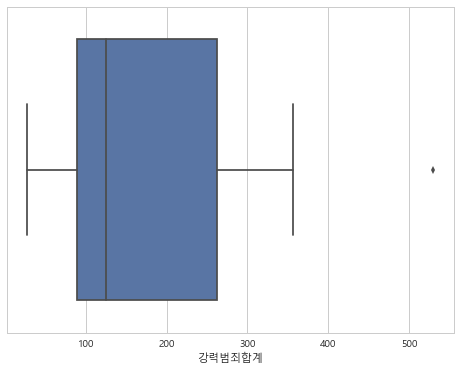

In [162]:
# 데이터 시각화
plt.figure(figsize=(8,6))

sns.boxplot(x=crime["강력범죄합계"]) # 1차원 박스 플롯
plt.show()

E:\Programs\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


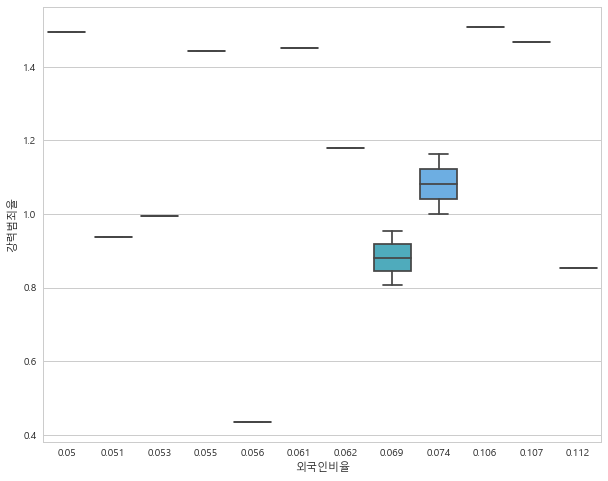

In [163]:
plt.figure(figsize=(10,8))
sns.boxplot(x="외국인비율", y="강력범죄율", data=crime) # 2차원 박스 플롯
plt.show()

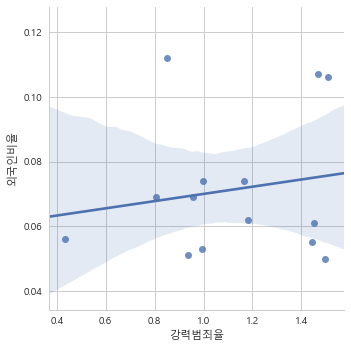

In [164]:
sns.pairplot(crime, x_vars=["강력범죄율"], y_vars = ['외국인비율'], kind = 'reg', size =5)    

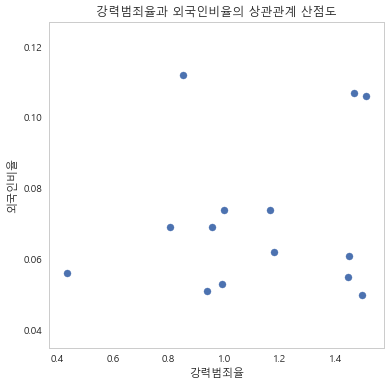

In [165]:
plt.figure(figsize=(6,6))
plt.scatter(crime['강력범죄율'], crime['외국인비율'], s=50)
plt.xlabel('강력범죄율')
plt.ylabel('외국인비율')
plt.title("강력범죄율과 외국인비율의 상관관계 산점도")
plt.grid()
plt.show()

In [170]:
# polyfit 함수를 이용해 지정한 특정 차수의 다항식 계수를 계산하고,
fp1 = np.polyfit(crime['강력범죄율'], crime['외국인비율'], 1)
fp1

array([ 0.01113882,  0.05887288])

In [171]:
# poly1d함수로 그 계수를 사용하여 실제 다항식을 만든다.
f1 = np.poly1d(fp1) # y축
fx = np.linspace(1.8,0,21) # x축

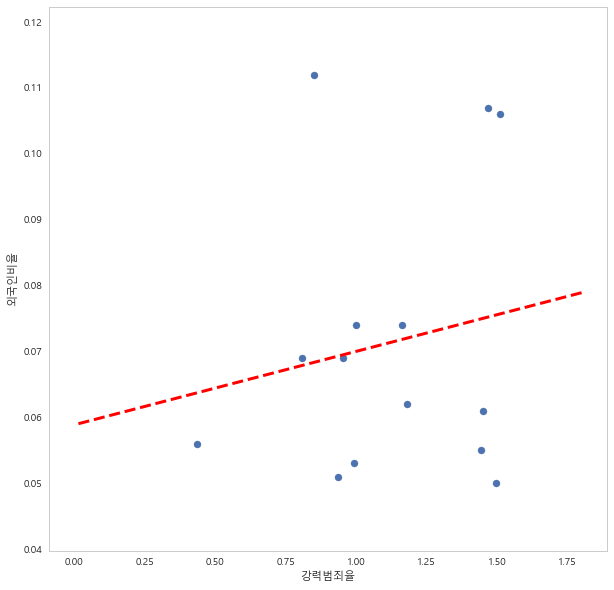

In [172]:
plt.figure(figsize=(10,10))
plt.scatter(crime['강력범죄율'], crime['외국인비율'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')
plt.xlabel('강력범죄율')
plt.ylabel('외국인비율')
plt.grid()
plt.show()

In [191]:
fp1 = np.polyfit(crime['강력범죄율'], crime['외국인비율'], 1)

f1 = np.poly1d(fp1) # y축
fx = np.linspace(1.8,0,21) # x축

# 오차를 추가한다.
crime['오차'] = np.abs(crime['외국인비율'] - f1(crime['강력범죄율']))

df_sort = crime.sort_values(by='오차', ascending=False)
df_sort

E:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,지역,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간 강제추행등,방화,절도범죄,...,안보범죄,선거범죄,병역범죄,기타범죄,강력범죄합계,범죄합계,강력범죄율,총인구,외국인비율,오차
35,화성,4,9,3,24,7,129,2,17,1866,...,0,3,189,4984,195,22887,0.852012,162698,0.112,0.043637
17,부천,6,11,17,108,15,339,10,24,4471,...,2,12,311,6287,530,36086,1.468714,743072,0.107,0.031767
23,안양,6,4,7,45,4,220,3,9,2003,...,0,5,135,2876,298,19743,1.509396,429321,0.106,0.030314
16,동두천,1,0,0,6,0,37,3,6,342,...,0,1,41,454,53,3544,1.495485,98625,0.050,0.025531
33,포천,2,4,3,30,1,45,2,16,546,...,0,5,82,883,103,7131,1.444398,322302,0.055,0.019962
68,김천,1,0,1,15,0,17,1,5,450,...,0,1,20,413,40,4271,0.936549,166043,0.051,0.018305
81,창원,3,15,26,68,7,202,7,29,3760,...,4,23,292,4535,357,35928,0.993654,262769,0.053,0.016941
15,남양주,3,7,9,60,2,165,2,18,1470,...,1,13,236,3232,266,18327,1.451410,472254,0.061,0.014040
22,안성,2,4,3,15,2,55,1,4,791,...,0,5,73,1158,86,7290,1.179698,215478,0.062,0.010013
34,하남,2,1,1,2,0,19,0,3,528,...,0,0,62,1217,28,6443,0.434580,207009,0.056,0.007714


In [192]:
df_sort

,지역,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간 강제추행등,방화,절도범죄,...,안보범죄,선거범죄,병역범죄,기타범죄,강력범죄합계,범죄합계,강력범죄율,총인구,외국인비율,오차
35,화성,4,9,3,24,7,129,2,17,1866,...,0,3,189,4984,195,22887,0.852012,162698,0.112,0.043637
17,부천,6,11,17,108,15,339,10,24,4471,...,2,12,311,6287,530,36086,1.468714,743072,0.107,0.031767
23,안양,6,4,7,45,4,220,3,9,2003,...,0,5,135,2876,298,19743,1.509396,429321,0.106,0.030314
16,동두천,1,0,0,6,0,37,3,6,342,...,0,1,41,454,53,3544,1.495485,98625,0.050,0.025531
33,포천,2,4,3,30,1,45,2,16,546,...,0,5,82,883,103,7131,1.444398,322302,0.055,0.019962
68,김천,1,0,1,15,0,17,1,5,450,...,0,1,20,413,40,4271,0.936549,166043,0.051,0.018305
81,창원,3,15,26,68,7,202,7,29,3760,...,4,23,292,4535,357,35928,0.993654,262769,0.053,0.016941
15,남양주,3,7,9,60,2,165,2,18,1470,...,1,13,236,3232,266,18327,1.451410,472254,0.061,0.014040
22,안성,2,4,3,15,2,55,1,4,791,...,0,5,73,1158,86,7290,1.179698,215478,0.062,0.010013
34,하남,2,1,1,2,0,19,0,3,528,...,0,0,62,1217,28,6443,0.434580,207009,0.056,0.007714


In [196]:
df_sort.set_index("지역", inplace=True)

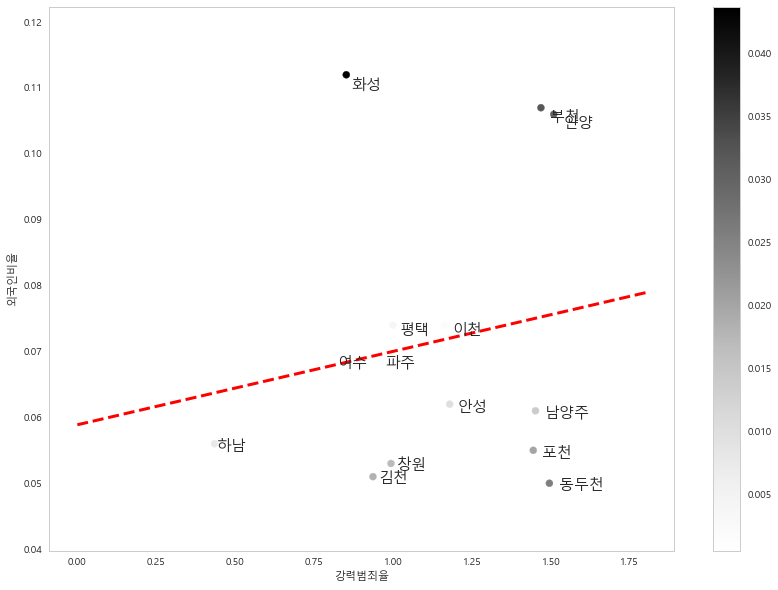

In [197]:
plt.figure(figsize=(14,10))
plt.scatter(crime['강력범죄율'], crime['외국인비율'], 
            c=crime['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')

for n in range(14):
    plt.text(df_sort['강력범죄율'][n]*1.02, df_sort['외국인비율'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('강력범죄율')
plt.ylabel('외국인비율')
plt.colorbar()
plt.grid()
plt.show()

In [198]:
np.corrcoef(crime["강력범죄율"],crime["외국인비율"])

array([[ 1.        ,  0.16732546],
       [ 0.16732546,  1.        ]])

강력범죄율과 외국인비율의 상관관계는 0.16732546으로 상관관계가 거의없다

## 결론
- 강력범죄율과 외국인비율의 상관관계는 거의 없다는 것이 나왔다
- 영화는 영화일뿐 외국인이 많은곳에 강력범죄가 일어나지는 않는다